# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the Data Science industry.
2. Use Python to explore a real/live dataset on job postings.
3. For job seekers: useful insights to help find the best job opportunities 

## Final Deliverables:

- 

## Questions to Answer

1. What are the mode demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What's the mode optimal skill to learn for Data Analysts? (High Demand AND High Paying)

## Exploratory Data Analysis for All Data Roles

### Roles to Explore

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


Found cached dataset csv (/Users/luciac/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-20095235c13fb98d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
# Data Cleanup
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


### Filter for US Data Analyst Roles

In [3]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

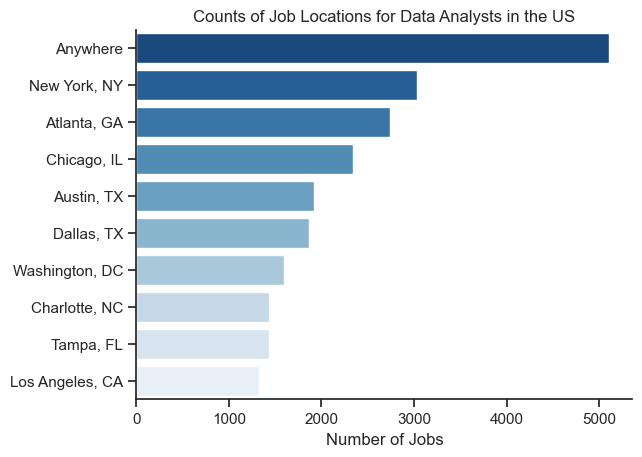

In [4]:
# Looking at most common job locations

df_plot = (
    df_DA_US['job_location']
    .value_counts()
    .head(10)
    .rename_axis('job_location')
    .reset_index(name='count')
)


sns.set_theme(style='ticks')
ax = sns.barplot(
    data=df_plot, 
    x='count', 
    y='job_location',
    hue='count',
    dodge=False,
    palette="Blues",
)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
ax.legend_.remove()
plt.show()

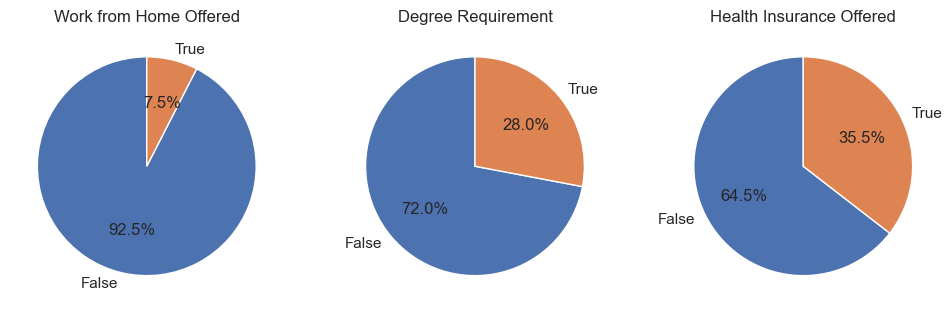

In [6]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'

}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.show()

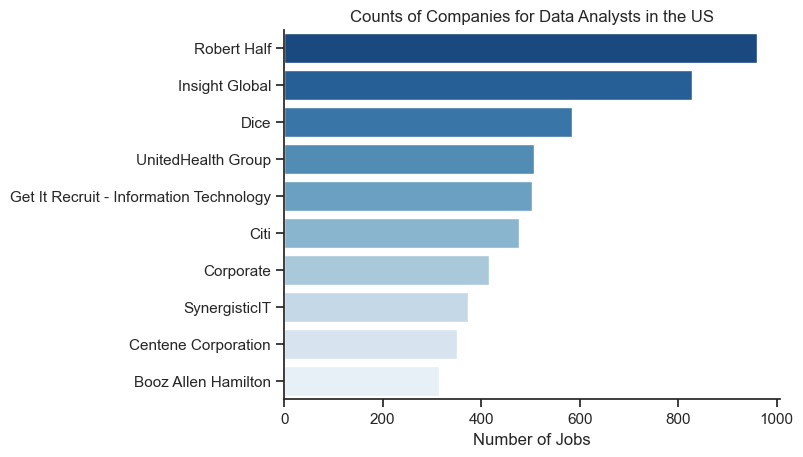

In [7]:
df_plot = (
    df_DA_US['company_name']
    .value_counts()
    .head(10)
    .rename_axis('company_name')
    .reset_index(name='count')
)


sns.set_theme(style='ticks')
ax = sns.barplot(
    data=df_plot, 
    x='count', 
    y='company_name',
    hue='count',
    dodge=False,
    palette="Blues",
)
sns.despine()
plt.title('Counts of Companies for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
ax.legend_.remove()
plt.show()